In [1]:
import random
import matplotlib.pyplot as plt

In [2]:
# =========================================================================
# 1. PARAMETER ALGORITMA GENETIKA
# Bagian ini digunakan untuk mengatur "aturan main" algoritma.
# Kamu bisa mengubah angka-angka ini untuk tugas poin 9 (eksperimen).
# =========================================================================
PS = 10          # Ukuran Populasi: Jumlah individu dalam satu kelompok
CR = 0.8         # Crossover Rate: Peluang terjadinya perkawinan silang (80%)
MR = 0.05        # Mutation Rate: Peluang terjadinya mutasi gen (5%)
MAX_GEN = 20     # Maksimal Generasi: Berapa kali proses evolusi diulang
BIT_LEN = 5      # Jumlah bit untuk variabel x dan y (masing-masing 5 bit)

In [3]:
# =========================================================================
# 2. FUNGSI-FUNGSI PENDUKUNG
# =========================================================================

def decode(kromosom):
    """
    Mengubah deretan biner (0101...) menjadi angka integer x dan y.
    Kromosom total 10 bit: 5 bit awal untuk x, 5 bit akhir untuk y.
    """
    str_x = "".join(map(str, kromosom[:BIT_LEN])) # Ambil bit 0-4
    str_y = "".join(map(str, kromosom[BIT_LEN:])) # Ambil bit 5-9
    return int(str_x, 2), int(str_y, 2)            # Ubah biner ke desimal

def fungsi_objektif(x, y):
    """Fungsi target sesuai soal: f(x, y) = x - 2y"""
    return x - 2 * y

def hitung_fitness(kromosom):
    """
    Menghitung seberapa 'baik' suatu individu. 
    Karena kita mencari nilai MINIMUM, maka nilai f(x,y) terkecil 
    harus memiliki fitness TERBESAR.
    Ditambah offset +63 agar nilai tidak negatif (Syarat Roulette Wheel).
    """
    x, y = decode(kromosom)
    obj = fungsi_objektif(x, y)
    # Rumus: 1 / (hasil + offset + 1)
    # Offset 63 digunakan karena nilai minimum x-2y adalah -62.
    return 1 / (obj + 63 + 1) 

def uniform_crossover(p1, p2, rate):
    """
    Proses perkawinan silang (Uniform).
    Setiap bit anak dipilih secara acak dari salah satu orang tua.
    """
    if random.random() < rate:
        c1, c2 = [], []
        for i in range(len(p1)):
            if random.random() < 0.5:
                c1.append(p1[i]); c2.append(p2[i])
            else:
                c1.append(p2[i]); c2.append(p1[i])
        return c1, c2
    return p1[:], p2[:] # Jika tidak crossover, anak sama dengan orang tua

def mutation(kromosom, rate):
    """Proses mutasi: mengubah bit 0 jadi 1 atau sebaliknya secara acak."""
    for i in range(len(kromosom)):
        if random.random() < rate:
            kromosom[i] = 1 if kromosom[i] == 0 else 0
    return kromosom

def roulette_selection(populasi, fitness_scores):
    """Memilih orang tua berdasarkan nilai fitness (mirip roda keberuntungan)."""
    total_fit = sum(fitness_scores)
    r = random.uniform(0, total_fit)
    temp = 0
    for i, fit in enumerate(fitness_scores):
        temp += fit
        if temp >= r:
            return populasi[i]
    return populasi[-1]

In [4]:
# =========================================================================
# 3. PROSES UTAMA (MAIN PROGRAM)
# =========================================================================

# A. Membuat Populasi Awal secara acak (Tugas Poin 4)
# Menghasilkan list berisi 10 individu, masing-masing punya 10 bit acak.
populasi = [[random.randint(0, 1) for _ in range(BIT_LEN * 2)] for _ in range(PS)]
history_avg_fitness = [] # Untuk menampung data grafik

print("=== GENERASI 1 (DATA AWAL) ===")
print(f"{'No':<3} | {'Kromosom':<11} | {'x':<3} | {'y':<3} | {'f(x,y)':<6} | {'Fitness':<8}")
print("-" * 60)

# Menampilkan populasi pertama kali sebelum evolusi (Tugas Poin 5)
for i, ind in enumerate(populasi):
    x, y = decode(ind)
    fit = hitung_fitness(ind)
    obj = fungsi_objektif(x, y)
    print(f"{i+1:<3} | {''.join(map(str, ind))} | {x:<3} | {y:<3} | {obj:<6} | {fit:.4f}")

# B. Perulangan Evolusi (Generasi 1 sampai 20)
for gen in range(MAX_GEN):
    # Hitung skor fitness untuk semua individu saat ini
    fitness_scores = [hitung_fitness(ind) for ind in populasi]
    
    # Simpan rata-rata fitness untuk grafik (Tugas Poin 8)
    history_avg_fitness.append(sum(fitness_scores) / PS)
    
    new_population = []
    
    # --- PROSES ELITISM ---
    # Mengambil 1 individu terbaik agar tidak hilang di generasi berikutnya
    best_idx = fitness_scores.index(max(fitness_scores))
    new_population.append(populasi[best_idx][:]) 
    
    # --- PROSES REPRODUKSI (Seleksi, Crossover, Mutasi) ---
    while len(new_population) < PS:
        # 1. Pilih 2 orang tua
        p1 = roulette_selection(populasi, fitness_scores)
        p2 = roulette_selection(populasi, fitness_scores)
        
        # 2. Lakukan perkawinan silang (Crossover)
        c1, c2 = uniform_crossover(p1, p2, CR)
        
        # 3. Lakukan mutasi gen
        c1 = mutation(c1, MR)
        c2 = mutation(c2, MR)
        
        # Tambahkan anak ke populasi baru
        new_population.append(c1)
        if len(new_population) < PS:
            new_population.append(c2)
            
    # Ganti populasi lama dengan populasi baru yang lebih "pintar"
    populasi = new_population

# C. Menampilkan Hasil Akhir setelah 20 Generasi
best_final = max(populasi, key=hitung_fitness)
bx, by = decode(best_final)
print("\n=== HASIL AKHIR SETELAH EVOLUSI ===")
print(f"Individu Terbaik ditemukan: x = {bx}, y = {by}")
print(f"Nilai Minimum f(x,y) = {fungsi_objektif(bx, by)}")

=== GENERASI 1 (DATA AWAL) ===
No  | Kromosom    | x   | y   | f(x,y) | Fitness 
------------------------------------------------------------
1   | 0111010001 | 14  | 17  | -20    | 0.0227
2   | 0111011001 | 14  | 25  | -36    | 0.0357
3   | 1111110001 | 31  | 17  | -3     | 0.0164
4   | 1010111101 | 21  | 29  | -37    | 0.0370
5   | 0010111001 | 5   | 25  | -45    | 0.0526
6   | 1010110000 | 21  | 16  | -11    | 0.0189
7   | 1011101100 | 23  | 12  | -1     | 0.0159
8   | 1100000000 | 24  | 0   | 24     | 0.0114
9   | 1111110100 | 31  | 20  | -9     | 0.0182
10  | 1110100110 | 29  | 6   | 17     | 0.0123

=== HASIL AKHIR SETELAH EVOLUSI ===
Individu Terbaik ditemukan: x = 0, y = 31
Nilai Minimum f(x,y) = -62


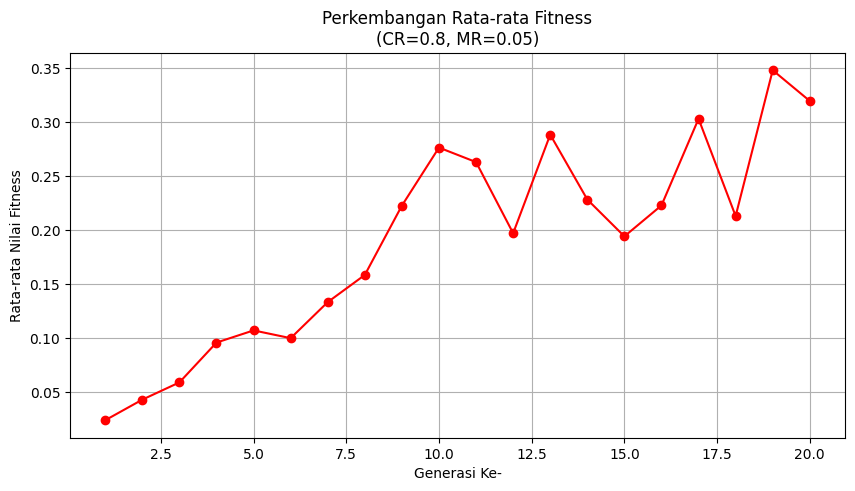

In [5]:
# =========================================================================
# 4. VISUALISASI GRAFIK (Tugas Poin 8)
# =========================================================================
plt.figure(figsize=(10, 5))
plt.plot(range(1, MAX_GEN + 1), history_avg_fitness, marker='o', linestyle='-', color='red')
plt.title(f"Perkembangan Rata-rata Fitness\n(CR={CR}, MR={MR})")
plt.xlabel("Generasi Ke-")
plt.ylabel("Rata-rata Nilai Fitness")
plt.grid(True)
plt.show() # Perintah untuk menampilkan grafik di layar